In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import joblib

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Kedzierski = pd.read_csv("/home/kumail/Energy_AI/Micro Palstic/Dataset/Kedzierski et Dataset.csv")
Kedzierski = Kedzierski.drop(columns=['Nom '])
Kedzierski

,Interpretation,3995.98555,3994.05698,3992.12842,3990.19985,3988.27129,3986.34272,3984.41416,3982.4856,3980.55703,...,617.14062,615.21206,613.2835,611.35493,609.42637,607.4978,605.56924,603.64067,601.71211,599.78354
0,Animal fibre like,-0.040366,-0.135578,-0.221583,-0.178677,-0.062108,0.036045,0.097367,0.140272,0.127931,...,4.588121,4.054936,3.972936,3.872520,3.164385,1.876155,0.578717,-0.018923,0.009571,0.047273
1,Cellulose acetate,-0.024702,0.001853,0.017036,0.032219,0.045128,0.046664,0.032280,-0.000299,-0.030605,...,2.623865,3.799876,4.907654,5.903986,7.259674,9.334074,11.783750,13.937754,15.418534,16.028218
2,Cellulose acetate,-0.030687,-0.020140,0.014730,0.049600,0.072308,0.076775,0.059961,0.015784,-0.010152,...,1.134722,2.385143,3.963910,5.874066,8.291944,11.536771,14.967054,17.345409,18.209716,17.684628
3,Cellulose acetate,-0.087176,-0.097008,-0.101351,-0.061781,0.021702,0.105184,0.117309,0.058075,-0.012137,...,6.068466,7.771580,8.914805,9.926292,11.322016,13.398389,15.831554,18.264719,20.258756,21.072635
4,Cellulose acetate,-0.037723,-0.025146,-0.026624,-0.028102,-0.010841,0.020474,0.040078,0.024545,-0.005042,...,3.276646,4.012427,4.809110,5.929048,7.569003,9.717262,11.926425,13.838100,15.285976,15.949142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Unknown,-0.043015,-0.050403,-0.064003,-0.083818,-0.075671,-0.042671,0.005863,0.082360,0.161963,...,3.505148,3.457383,2.965346,2.445349,2.201856,1.694285,0.708268,-0.001245,0.243029,1.180117
966,Unknown,-0.174344,-0.053499,0.067348,0.154828,0.186696,0.207442,0.261555,0.248934,0.136215,...,-2.542803,-7.030846,-10.795946,-12.247627,-12.119956,-12.281461,-12.932345,-13.171705,-12.098646,-9.746533
967,Unknown,0.011578,0.019579,0.023000,0.014971,0.001218,-0.005666,-0.002245,0.002321,0.000017,...,0.920250,1.039209,1.166181,1.209574,1.239227,1.249415,1.218386,1.236588,1.281125,1.215747
968,Unknown,-0.019956,-0.008994,0.009676,0.023529,0.026783,0.016549,0.003424,0.003788,0.013787,...,1.465810,1.571245,1.729672,1.806202,1.857681,1.917833,1.903797,1.848330,1.850673,1.860723


In [3]:
interpretation_counts = Kedzierski['Interpretation '].value_counts()
interpretation_counts

Interpretation 
Poly(ethylene)               228
Poly(propylene)              195
Poly(ethylene) + fouling     148
Poly(styrene)                 66
Morphotype 1                  55
Cellulose acetate             54
Ethylene propylene rubber     49
Poly(propylene) like          48
PEVA                          43
Poly(ethylene) like           25
Poly(amide)                   21
Cellulose like                16
Morphotype 2                  11
Unknown                        5
PMMA                           3
Poly(urethane)                 1
Poly(vinylchloride)            1
Animal fibre like              1
Name: count, dtype: int64

In [4]:
values_to_remove = ['PMMA', 'Poly(urethane)', 'Poly(vinylchloride)', 'Animal fibre like']
Kedzierski = Kedzierski[~Kedzierski['Interpretation '].isin(values_to_remove)]
Kedzierski['Interpretation '] = Kedzierski['Interpretation '].replace('Poly(propylene) like', 'Poly(propylene)')
Kedzierski['Interpretation '] = Kedzierski['Interpretation '].replace('Cellulose like', 'Cellulose acetate')
Kedzierski


/tmp/ipykernel_35675/2595466651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kedzierski['Interpretation '] = Kedzierski['Interpretation '].replace('Poly(propylene) like', 'Poly(propylene)')
/tmp/ipykernel_35675/2595466651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kedzierski['Interpretation '] = Kedzierski['Interpretation '].replace('Cellulose like', 'Cellulose acetate')


,Interpretation,3995.98555,3994.05698,3992.12842,3990.19985,3988.27129,3986.34272,3984.41416,3982.4856,3980.55703,...,617.14062,615.21206,613.2835,611.35493,609.42637,607.4978,605.56924,603.64067,601.71211,599.78354
1,Cellulose acetate,-0.024702,0.001853,0.017036,0.032219,0.045128,0.046664,0.032280,-0.000299,-0.030605,...,2.623865,3.799876,4.907654,5.903986,7.259674,9.334074,11.783750,13.937754,15.418534,16.028218
2,Cellulose acetate,-0.030687,-0.020140,0.014730,0.049600,0.072308,0.076775,0.059961,0.015784,-0.010152,...,1.134722,2.385143,3.963910,5.874066,8.291944,11.536771,14.967054,17.345409,18.209716,17.684628
3,Cellulose acetate,-0.087176,-0.097008,-0.101351,-0.061781,0.021702,0.105184,0.117309,0.058075,-0.012137,...,6.068466,7.771580,8.914805,9.926292,11.322016,13.398389,15.831554,18.264719,20.258756,21.072635
4,Cellulose acetate,-0.037723,-0.025146,-0.026624,-0.028102,-0.010841,0.020474,0.040078,0.024545,-0.005042,...,3.276646,4.012427,4.809110,5.929048,7.569003,9.717262,11.926425,13.838100,15.285976,15.949142
5,Cellulose acetate,-0.023645,0.002247,0.007651,0.007933,0.013337,0.021302,0.021584,0.016744,0.011904,...,3.420510,4.188933,5.169919,6.404445,7.787509,9.603384,11.839263,14.054654,15.622111,15.870649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Unknown,-0.043015,-0.050403,-0.064003,-0.083818,-0.075671,-0.042671,0.005863,0.082360,0.161963,...,3.505148,3.457383,2.965346,2.445349,2.201856,1.694285,0.708268,-0.001245,0.243029,1.180117
966,Unknown,-0.174344,-0.053499,0.067348,0.154828,0.186696,0.207442,0.261555,0.248934,0.136215,...,-2.542803,-7.030846,-10.795946,-12.247627,-12.119956,-12.281461,-12.932345,-13.171705,-12.098646,-9.746533
967,Unknown,0.011578,0.019579,0.023000,0.014971,0.001218,-0.005666,-0.002245,0.002321,0.000017,...,0.920250,1.039209,1.166181,1.209574,1.239227,1.249415,1.218386,1.236588,1.281125,1.215747
968,Unknown,-0.019956,-0.008994,0.009676,0.023529,0.026783,0.016549,0.003424,0.003788,0.013787,...,1.465810,1.571245,1.729672,1.806202,1.857681,1.917833,1.903797,1.848330,1.850673,1.860723


In [5]:
interpretation_counts = Kedzierski['Interpretation '].value_counts()
interpretation_counts

Interpretation 
Poly(propylene)              243
Poly(ethylene)               228
Poly(ethylene) + fouling     148
Cellulose acetate             70
Poly(styrene)                 66
Morphotype 1                  55
Ethylene propylene rubber     49
PEVA                          43
Poly(ethylene) like           25
Poly(amide)                   21
Morphotype 2                  11
Unknown                        5
Name: count, dtype: int64

In [6]:
label_encoder = LabelEncoder()

# Fit and transform the 'Interpretation' column
Kedzierski['Interpretation_encoded'] = label_encoder.fit_transform(Kedzierski['Interpretation '])
Kedzierski = Kedzierski.drop(columns=['Interpretation '])
Kedzierski

/tmp/ipykernel_35675/2974020699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kedzierski['Interpretation_encoded'] = label_encoder.fit_transform(Kedzierski['Interpretation '])


,3995.98555,3994.05698,3992.12842,3990.19985,3988.27129,3986.34272,3984.41416,3982.4856,3980.55703,3978.62847,...,615.21206,613.2835,611.35493,609.42637,607.4978,605.56924,603.64067,601.71211,599.78354,Interpretation_encoded
1,-0.024702,0.001853,0.017036,0.032219,0.045128,0.046664,0.032280,-0.000299,-0.030605,-0.029068,...,3.799876,4.907654,5.903986,7.259674,9.334074,11.783750,13.937754,15.418534,16.028218,0
2,-0.030687,-0.020140,0.014730,0.049600,0.072308,0.076775,0.059961,0.015784,-0.010152,0.003436,...,2.385143,3.963910,5.874066,8.291944,11.536771,14.967054,17.345409,18.209716,17.684628,0
3,-0.087176,-0.097008,-0.101351,-0.061781,0.021702,0.105184,0.117309,0.058075,-0.012137,-0.016480,...,7.771580,8.914805,9.926292,11.322016,13.398389,15.831554,18.264719,20.258756,21.072635,0
4,-0.037723,-0.025146,-0.026624,-0.028102,-0.010841,0.020474,0.040078,0.024545,-0.005042,-0.015890,...,4.012427,4.809110,5.929048,7.569003,9.717262,11.926425,13.838100,15.285976,15.949142,0
5,-0.023645,0.002247,0.007651,0.007933,0.013337,0.021302,0.021584,0.016744,0.011904,0.014747,...,4.188933,5.169919,6.404445,7.787509,9.603384,11.839263,14.054654,15.622111,15.870649,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,-0.043015,-0.050403,-0.064003,-0.083818,-0.075671,-0.042671,0.005863,0.082360,0.161963,0.188749,...,3.457383,2.965346,2.445349,2.201856,1.694285,0.708268,-0.001245,0.243029,1.180117,11
966,-0.174344,-0.053499,0.067348,0.154828,0.186696,0.207442,0.261555,0.248934,0.136215,0.123594,...,-7.030846,-10.795946,-12.247627,-12.119956,-12.281461,-12.932345,-13.171705,-12.098646,-9.746533,11
967,0.011578,0.019579,0.023000,0.014971,0.001218,-0.005666,-0.002245,0.002321,0.000017,-0.003432,...,1.039209,1.166181,1.209574,1.239227,1.249415,1.218386,1.236588,1.281125,1.215747,11
968,-0.019956,-0.008994,0.009676,0.023529,0.026783,0.016549,0.003424,0.003788,0.013787,0.017042,...,1.571245,1.729672,1.806202,1.857681,1.917833,1.903797,1.848330,1.850673,1.860723,11


In [7]:
X = Kedzierski.drop(columns=['Interpretation_encoded'])
Y = Kedzierski['Interpretation_encoded']

In [8]:
normalizer = Normalizer(norm='max')
data_scaled = normalizer.fit_transform(X)
pca = PCA(n_components=9)
data_pca = pca.fit_transform(data_scaled)

print(data_pca.shape)

# Check how much variance each component explains
print("Explained Variance Ratio of each principal component:")
print(pca.explained_variance_ratio_)

(964, 9)
Explained Variance Ratio of each principal component:
[0.43904799 0.18681138 0.09314351 0.07201679 0.05131966 0.04641061
 0.02171613 0.01427455 0.01371616]


In [18]:
def split_and_scale_data(X, Y, test_size=0.2, random_state=60):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"After preprocessing Training set size: {X_train.shape}")
    print(f"After preprocessing Test set size: {X_test.shape}")
    return X_train, X_test, Y_train,  Y_test

X_train_scaled,  X_test_scaled, Y_train,  Y_test = split_and_scale_data(data_pca, Y)
from collections import Counter

class_counts = Counter(Y_train)
print("Class counts in Y_train:", class_counts)

class_counts = Counter(Y_test)
print("Class counts in Y_test:", class_counts)

Training set size: 771
Test set size: 193
After preprocessing Training set size: (771, 9)
After preprocessing Test set size: (193, 9)
Class counts in Y_train: Counter({9: 188, 6: 183, 7: 118, 0: 60, 10: 50, 2: 49, 1: 41, 4: 37, 8: 17, 5: 16, 3: 9, 11: 3})
Class counts in Y_test: Counter({9: 55, 6: 45, 7: 30, 10: 16, 0: 10, 1: 8, 8: 8, 4: 6, 2: 6, 5: 5, 3: 2, 11: 2})


In [19]:
clf1 = ExtraTreesClassifier(
    n_estimators=500, max_depth=35, min_samples_split=7, min_samples_leaf=1, max_features='sqrt', random_state=42
)
clf2 = DecisionTreeClassifier(
    max_depth=15, min_samples_split=14, min_samples_leaf=5, criterion='entropy', random_state=42
)
clf3 = SVC(
    C=42.26721781758463, kernel='rbf', gamma='auto', probability=True, random_state=42
)
clf4 = xgb.XGBClassifier(
    n_estimators=900, max_depth=9, learning_rate=0.21577743453773293,
    subsample=0.7134596184717141, colsample_bytree=0.8926104458835206, 
    gamma=0.06934334083160099, reg_alpha=0.6613878247418032, reg_lambda=0.26856628937579974,
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)
clf5 = lgb.LGBMClassifier(
    n_estimators=700, max_depth=7, learning_rate=0.0855852309100438, num_leaves=138, 
    min_child_samples=62, subsample=0.9673844529941501, colsample_bytree=0.7343207921501621,
    reg_alpha=0.2369598754789148, reg_lambda=0.5701128436794478, random_state=42
)
clf6 = RandomForestClassifier(
    n_estimators=200, max_depth=30, min_samples_split=4, min_samples_leaf=1, 
    max_features='log2', bootstrap=True, random_state=42
)
clf9 = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.17387802436141037, max_depth=10, 
    min_samples_split=12, min_samples_leaf=6, subsample=0.547399138004244, 
    max_features='sqrt', loss='log_loss', random_state=42
)
clf10 = AdaBoostClassifier(
    n_estimators=500, learning_rate=0.6574797025901895, algorithm='SAMME.R', random_state=42
)
clf11 = cb.CatBoostClassifier(
    n_estimators=600, learning_rate=0.07472477144852825, max_depth=10, min_data_in_leaf=9, 
    l2_leaf_reg=7.404283846568703, border_count=192, silent=True, random_state=42
)
clf12 = MLPClassifier(
    hidden_layer_sizes=(64, 128), activation='relu', solver='lbfgs', 
    alpha=0.09632315546143085, learning_rate='invscaling', max_iter=1800, random_state=42
)

# Stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[
        ('et', clf1), ('dt', clf2), ('svc', clf3), ('xgb', clf4), 
        ('lgbm', clf5), ('rf', clf6), ('gb', clf9), 
        ('ab', clf10), ('catboost', clf11), ('mlp', clf12)
    ],
    final_estimator=cb.CatBoostClassifier(
    n_estimators=600, learning_rate=0.07472477144852825, max_depth=10, min_data_in_leaf=9, 
    l2_leaf_reg=7.404283846568703, border_count=192, silent=True, random_state=42)
)

In [20]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('model', stacking_clf)  
])

In [21]:
stacking_clf.fit(X_train_scaled, Y_train)
y_pred = stacking_clf.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class

Stacking Classifier Accuracy: 0.9482


/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
joblib.dump(stacking_clf, 'Kedzierski_Stacking_CatBoost_PCA_9_80_20_split_stacking_clf_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [22]:
y_pred = stacking_clf.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' as needed
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(Y_test, y_pred)

# Print Results
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier F1 Score: {f1:.4f}")
print(f"Stacking Classifier Precision: {precision:.4f}")
print(f"Stacking Classifier Recall: {recall:.4f}")
print(f"Stacking Classifier Kappa Score: {kappa:.4f}")

Stacking Classifier Accuracy: 0.9482
Stacking Classifier F1 Score: 0.9426
Stacking Classifier Precision: 0.9383
Stacking Classifier Recall: 0.9482
Stacking Classifier Kappa Score: 0.9370


/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
target_names = label_encoder.classes_
print(classification_report(Y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

        Cellulose acetate       0.73      0.80      0.76        10
Ethylene propylene rubber       1.00      1.00      1.00         8
             Morphotype 1       1.00      1.00      1.00         6
             Morphotype 2       1.00      1.00      1.00         2
                     PEVA       1.00      1.00      1.00         6
              Poly(amide)       1.00      1.00      1.00         5
           Poly(ethylene)       0.98      1.00      0.99        45
 Poly(ethylene) + fouling       0.89      0.80      0.84        30
      Poly(ethylene) like       1.00      1.00      1.00         8
          Poly(propylene)       0.96      1.00      0.98        55
            Poly(styrene)       0.94      1.00      0.97        16
                  Unknown       0.00      0.00      0.00         2

                 accuracy                           0.95       193
                macro avg       0.88      0.88      0.88    

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

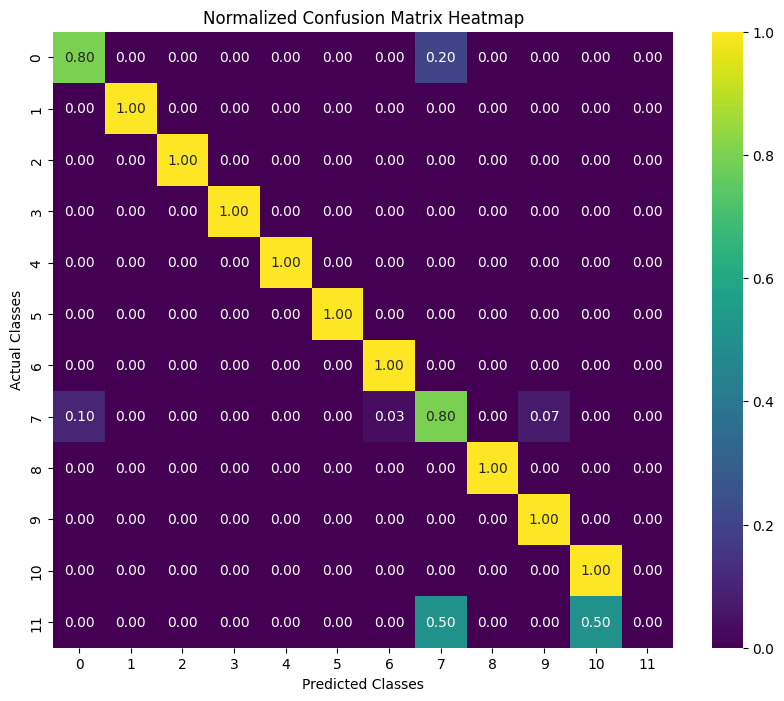

In [24]:
conf_matrix = confusion_matrix(Y_test, y_pred)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=np.round(conf_matrix_normalized, 2), fmt='.2f', cmap='viridis', 
            xticklabels=sorted(set(Y_test)), 
            yticklabels=sorted(set(Y_test)))

# Labels and title
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.title('Normalized Confusion Matrix Heatmap')
plt.savefig('Kedzierski_confusion_matrix.tiff', format='tiff', dpi=300)
plt.show()

### Jung Dataset

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_val_score
import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Jung = pd.read_csv("/home/kumail/Energy_AI/Micro Palstic/Dataset/Jung et Dataset.csv")
Jung = Jung.drop(columns=['Turtle_piece.scan'])
Jung

,identified,4000,3999,3998,3997,3996,3995,3994,3993,3992,...,459,458,457,456,455,454,453,452,451,450
0,HDPE,99.51,99.51,99.51,99.51,99.51,99.50,99.50,99.50,99.50,...,96.83,96.84,96.85,96.83,96.77,96.66,96.54,96.46,96.43,96.44
1,PP,99.03,99.03,99.03,99.03,99.02,99.02,99.02,99.02,99.02,...,93.80,93.77,93.86,94.01,94.09,94.09,94.08,94.12,94.23,94.36
2,PP,99.23,99.22,99.22,99.21,99.21,99.20,99.20,99.21,99.21,...,93.98,94.00,94.05,94.09,94.14,94.23,94.38,94.57,94.75,94.87
3,Mixture,99.50,99.50,99.50,99.50,99.51,99.51,99.51,99.51,99.51,...,96.41,96.45,96.50,96.55,96.62,96.68,96.74,96.77,96.78,96.80
4,HDPE,99.55,99.56,99.56,99.57,99.57,99.57,99.56,99.56,99.56,...,95.28,95.22,95.23,95.30,95.38,95.41,95.35,95.24,95.21,95.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,PP,99.75,99.75,99.75,99.75,99.75,99.75,99.74,99.74,99.73,...,98.58,98.58,98.65,98.76,98.85,98.88,98.87,98.87,98.92,98.98
796,Mixture,99.62,99.62,99.62,99.63,99.63,99.63,99.63,99.63,99.63,...,97.02,97.08,97.16,97.23,97.27,97.30,97.32,97.34,97.39,97.47
797,Mixture,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.93,99.93,...,96.94,97.01,97.05,97.07,97.08,97.06,97.01,96.97,96.97,97.02
798,HDPE,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.57,...,94.32,94.38,94.46,94.51,94.52,94.52,94.53,94.51,94.42,94.31


In [3]:
Jung_counts = Jung['identified'].value_counts()
Jung_counts

identified
HDPE       438
PP         272
Mixture     39
LDPE        37
PS           7
Unknown      4
Nylon        1
PVC          1
PETE         1
Name: count, dtype: int64

In [4]:
values_to_remove = ['Nylon', 'PVC', 'PETE']
Jung = Jung[~Jung['identified'].isin(values_to_remove)]
Jung['identified'] = Jung['identified'].replace('PS', 'Unknown')
Jung_counts = Jung['identified'].value_counts()
Jung_counts

/tmp/ipykernel_34339/832293166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jung['identified'] = Jung['identified'].replace('PS', 'Unknown')


identified
HDPE       438
PP         272
Mixture     39
LDPE        37
Unknown     11
Name: count, dtype: int64

In [5]:
label_encoder = LabelEncoder()

# Fit and transform the 'Interpretation' column
Jung['identified_encoded'] = label_encoder.fit_transform(Jung['identified'])
Jung = Jung.drop(columns=['identified'])
Jung

/tmp/ipykernel_34339/1603336163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jung['identified_encoded'] = label_encoder.fit_transform(Jung['identified'])


,4000,3999,3998,3997,3996,3995,3994,3993,3992,3991,...,458,457,456,455,454,453,452,451,450,identified_encoded
0,99.51,99.51,99.51,99.51,99.51,99.50,99.50,99.50,99.50,99.51,...,96.84,96.85,96.83,96.77,96.66,96.54,96.46,96.43,96.44,0
1,99.03,99.03,99.03,99.03,99.02,99.02,99.02,99.02,99.02,99.02,...,93.77,93.86,94.01,94.09,94.09,94.08,94.12,94.23,94.36,3
2,99.23,99.22,99.22,99.21,99.21,99.20,99.20,99.21,99.21,99.22,...,94.00,94.05,94.09,94.14,94.23,94.38,94.57,94.75,94.87,3
3,99.50,99.50,99.50,99.50,99.51,99.51,99.51,99.51,99.51,99.51,...,96.45,96.50,96.55,96.62,96.68,96.74,96.77,96.78,96.80,2
4,99.55,99.56,99.56,99.57,99.57,99.57,99.56,99.56,99.56,99.56,...,95.22,95.23,95.30,95.38,95.41,95.35,95.24,95.21,95.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,99.75,99.75,99.75,99.75,99.75,99.75,99.74,99.74,99.73,99.73,...,98.58,98.65,98.76,98.85,98.88,98.87,98.87,98.92,98.98,3
796,99.62,99.62,99.62,99.63,99.63,99.63,99.63,99.63,99.63,99.64,...,97.08,97.16,97.23,97.27,97.30,97.32,97.34,97.39,97.47,2
797,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.93,99.93,99.93,...,97.01,97.05,97.07,97.08,97.06,97.01,96.97,96.97,97.02,2
798,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.57,99.57,...,94.38,94.46,94.51,94.52,94.52,94.53,94.51,94.42,94.31,0


In [6]:
X = Jung.drop(columns=['identified_encoded'])
Y = Jung['identified_encoded']

In [7]:
normalizer = Normalizer(norm='max')
data_scaled = normalizer.fit_transform(X)
pca = PCA(n_components=9)
data_pca = pca.fit_transform(data_scaled)

print(data_pca.shape)

# Check how much variance each component explains
print("Explained Variance Ratio of each principal component:")
print(pca.explained_variance_ratio_)

(797, 9)
Explained Variance Ratio of each principal component:
[0.49899195 0.282692   0.10894243 0.05868484 0.02262672 0.00786886
 0.00572934 0.00241824 0.00206183]


In [8]:
def split_and_scale_data(X, Y, test_size=0.2, random_state=60):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, random_state=random_state)
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"After preprocessing Training set size: {X_train.shape}")
    print(f"After preprocessing Test set size: {X_test.shape}")
    
    
    return X_train, X_test, Y_train,  Y_test
X_train_scaled,  X_test_scaled, Y_train,  Y_test = split_and_scale_data(data_pca, Y)

from collections import Counter

class_counts = Counter(Y_train)
print("Class counts in Y_train:", class_counts)

class_counts = Counter(Y_test)
print("Class counts in Y_test:", class_counts)

Training set size: 637
Test set size: 160
After preprocessing Training set size: (637, 9)
After preprocessing Test set size: (160, 9)
Class counts in Y_train: Counter({0: 350, 3: 217, 2: 31, 1: 30, 4: 9})
Class counts in Y_test: Counter({0: 88, 3: 55, 2: 8, 1: 7, 4: 2})


In [9]:
clf1 = ExtraTreesClassifier(
    n_estimators=500, max_depth=35, min_samples_split=7, min_samples_leaf=1, max_features='sqrt', random_state=42
)
clf2 = DecisionTreeClassifier(
    max_depth=15, min_samples_split=14, min_samples_leaf=5, criterion='entropy', random_state=42
)
clf3 = SVC(
    C=42.26721781758463, kernel='rbf', gamma='auto', probability=True, random_state=42
)
clf4 = xgb.XGBClassifier(
    n_estimators=900, max_depth=9, learning_rate=0.21577743453773293,
    subsample=0.7134596184717141, colsample_bytree=0.8926104458835206, 
    gamma=0.06934334083160099, reg_alpha=0.6613878247418032, reg_lambda=0.26856628937579974,
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)
clf5 = lgb.LGBMClassifier(
    n_estimators=700, max_depth=7, learning_rate=0.0855852309100438, num_leaves=138, 
    min_child_samples=62, subsample=0.9673844529941501, colsample_bytree=0.7343207921501621,
    reg_alpha=0.2369598754789148, reg_lambda=0.5701128436794478, random_state=42
)
clf6 = RandomForestClassifier(
    n_estimators=200, max_depth=30, min_samples_split=4, min_samples_leaf=1, 
    max_features='log2', bootstrap=True, random_state=42
)
clf9 = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.17387802436141037, max_depth=10, 
    min_samples_split=12, min_samples_leaf=6, subsample=0.547399138004244, 
    max_features='sqrt', loss='log_loss', random_state=42
)
clf10 = AdaBoostClassifier(
    n_estimators=500, learning_rate=0.6574797025901895, algorithm='SAMME.R', random_state=42
)
clf11 = cb.CatBoostClassifier(
    n_estimators=600, learning_rate=0.07472477144852825, max_depth=10, min_data_in_leaf=9, 
    l2_leaf_reg=7.404283846568703, border_count=192, silent=True, random_state=42
)
clf12 = MLPClassifier(
    hidden_layer_sizes=(64, 128), activation='relu', solver='lbfgs', 
    alpha=0.09632315546143085, learning_rate='invscaling', max_iter=1800, random_state=42
)

# Stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[
        ('et', clf1), ('dt', clf2), ('svc', clf3), ('xgb', clf4), 
        ('lgbm', clf5), ('rf', clf6), ('gb', clf9), 
        ('ab', clf10), ('catboost', clf11), ('mlp', clf12)
    ],
    final_estimator=cb.CatBoostClassifier(
    n_estimators=600, learning_rate=0.07472477144852825, max_depth=10, min_data_in_leaf=9, 
    l2_leaf_reg=7.404283846568703, border_count=192, silent=True, random_state=42
)
)

In [10]:
pipeline = Pipeline([
    ('model', stacking_clf)  
])

In [11]:
stacking_clf.fit(X_train_scaled, Y_train)
y_pred = stacking_clf.predict(X_test_scaled)

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

In [12]:
y_pred = stacking_clf.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='weighted')  
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(Y_test, y_pred)

# Print Results
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier F1 Score: {f1:.4f}")
print(f"Stacking Classifier Recall: {recall:.4f}")
print(f"Stacking Classifier Precision: {precision:.4f}")
print(f"Stacking Classifier Kappa Score: {kappa:.4f}")

Stacking Classifier Accuracy: 0.9437
Stacking Classifier F1 Score: 0.9420
Stacking Classifier Recall: 0.9437
Stacking Classifier Precision: 0.9436
Stacking Classifier Kappa Score: 0.9023


/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
joblib.dump(stacking_clf, 'Jung_PCA_9_80_20_split_stacking_clf_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [14]:
target_names = label_encoder.classes_
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        HDPE       0.96      0.97      0.96        88
        LDPE       0.60      0.43      0.50         7
     Mixture       0.80      1.00      0.89         8
          PP       1.00      0.96      0.98        55
     Unknown       0.67      1.00      0.80         2

    accuracy                           0.94       160
   macro avg       0.80      0.87      0.83       160
weighted avg       0.94      0.94      0.94       160



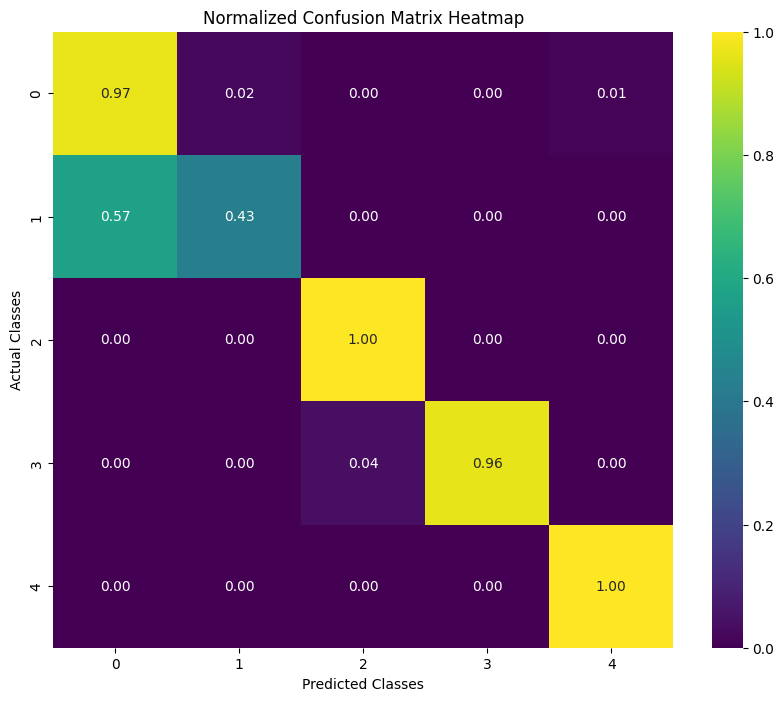

In [15]:
conf_matrix = confusion_matrix(Y_test, y_pred)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=np.round(conf_matrix_normalized, 2), fmt='.2f', cmap='viridis', 
            xticklabels=sorted(set(Y_test)), 
            yticklabels=sorted(set(Y_test)))

# Labels and title
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.title('Normalized Confusion Matrix Heatmap')
plt.savefig('Jung_confusion_matrix.tiff', format='tiff', dpi=300)
plt.show()